In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\mande\OneDrive\Documents\Instacart Basket folder 20th April 2023'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', '4.8 orders_products_merged_aggregated.pkl'))

In [4]:
df_customers = pd.read_csv(os.path.join(path, 'Data', 'original data', 'customers.csv'))

In [5]:
ords_prods_merge.head()

order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329        1             1                  2                  8   
1   2398795        1             2                  3                  7   
2    473747        1             3                  3                 12   
3   2254736        1             4                  4                  7   
4    431534        1             5                  4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  department_id  prices  _merge busiest_period_of_day  \
0         Soda  ...              7     9.0    both        Average orders   
1         Soda  ...              7     9.0    both        Average orders   
2         Soda  ...              7     9.0    both           Most orders   
3         Soda  ...              7     9.0    both        Average orders   
4         Soda  ...              7     9.0    both           Most orders   

  max_order  loyalty_flag     price  spending_flag median  \
0        10  New customer  6.367797    Low spender   20.5   
1        10  New customer  6.367797    Low spender   20.5   
2        10  New customer  6.367797    Low spender   20.5   
3        10  New customer  6.367797    Low spender   20.5   
4        10  New customer  6.367797    Low spender   20.5   

          Frequency flag  
0  Non frequent customer  
1  Non frequent customer  
2  Non frequent customer  
3  Non frequent customer  
4  Non frequent customer  

[5 rows x 21 columns]

In [6]:
df_customers.head()

user_id First Name    Surnam  Gender       STATE  Age date_joined  \
0    26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
1    33890   Patricia      Hart  Female  New Mexico   36    1/1/2017   
2    65803    Kenneth    Farley    Male       Idaho   35    1/1/2017   
3   125935   Michelle     Hicks  Female        Iowa   40    1/1/2017   
4   130797        Ann   Gilmore  Female    Maryland   26    1/1/2017   

   n_dependants fam_status  income  
0             3    married  165665  
1             0     single   59285  
2             2    married   99568  
3             0     single   42049  
4             1    married   40374

In [7]:
df_customers = df_customers.rename(columns ={'Surnam' :'Last Name'})

In [8]:
df_customers.head(1)

user_id First Name Last Name  Gender     STATE  Age date_joined  \
0    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   

   n_dependants fam_status  income  
0             3    married  165665

In [9]:
df_customers.dtypes

user_id          int64
First Name      object
Last Name       object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

above code is showing data type. I don't think I should change any type.

In [10]:
df_customers.shape

(206209, 10)

In [11]:
#droping missing values
df_customers = df_customers.dropna()

In [12]:
#chaecking if data changed
df_customers.shape

(194950, 10)

In [13]:
#droping duplicates
df_customers = df_customers.drop_duplicates()

In [14]:
# re_checking data if there is any change
df_customers.shape

(194950, 10)

from above code we can see we had missing values but no duplicates. so now our code is free from missing value that is reason our rows are less than original data.

In [15]:
#df_merged = ords_prods_merge.merge(df_customers, on='user_id', '')
df_merged = ords_prods_merge.merge(df_customers, on='user_id', indicator = 'Ture')

In [16]:
df_merged.shape

(30657347, 31)

In [17]:
df_merged.head()

order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329        1             1                  2                  8   
1   2398795        1             2                  3                  7   
2    473747        1             3                  3                 12   
3   2254736        1             4                  4                  7   
4    431534        1             5                  4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  First Name  Last Name  Gender    STATE Age  date_joined  \
0         Soda  ...       Linda     Nguyen  Female  Alabama  31    2/17/2019   
1         Soda  ...       Linda     Nguyen  Female  Alabama  31    2/17/2019   
2         Soda  ...       Linda     Nguyen  Female  Alabama  31    2/17/2019   
3         Soda  ...       Linda     Nguyen  Female  Alabama  31    2/17/2019   
4         Soda  ...       Linda     Nguyen  Female  Alabama  31    2/17/2019   

  n_dependants  fam_status income  Ture  
0            3     married  40423  both  
1            3     married  40423  both  
2            3     married  40423  both  
3            3     married  40423  both  
4            3     married  40423  both  

[5 rows x 31 columns]

In [21]:
df_merged_few = df_merged[:1000000]

##Part two
Step 1 and step 2 done 

In [23]:
#Step 3 descriptive findings
df_merged_few.describe()

order_id         user_id    order_number  order_day_of_week  \
count  1.000000e+06  1000000.000000  1000000.000000     1000000.000000   
mean   1.707518e+06    93781.130006       19.859725           2.863347   
std    9.891915e+05    54508.086381       19.011238           1.902214   
min    1.300000e+01        1.000000        1.000000           0.000000   
25%    8.498860e+05    45910.000000        6.000000           1.000000   
50%    1.708112e+06    93939.000000       13.000000           3.000000   
75%    2.561707e+06   140716.000000       28.000000           5.000000   
max    3.420972e+06   188387.000000       99.000000           6.000000   

       order_hour_of_day  days_since_prior_order      product_id  \
count     1000000.000000           950041.000000  1000000.000000   
mean           12.891683               10.163136    24244.579045   
std             4.028358                8.340668    14642.018651   
min             0.000000                0.000000        1.000000   
25%            10.000000                4.000000    12099.000000   
50%            13.000000                7.000000    23758.000000   
75%            16.000000               14.000000    37646.000000   
max            23.000000               30.000000    49688.000000   

       add_to_cart_order       reordered        aisle_id   department_id  \
count     1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean            7.177686        0.624475       70.461184       10.456637   
std             7.025855        0.484258       37.065130        6.215904   
min             1.000000        0.000000        1.000000        1.000000   
25%             2.000000        0.000000       32.000000        4.000000   
50%             5.000000        1.000000       77.000000        9.000000   
75%            10.000000        1.000000      107.000000       16.000000   
max            88.000000        1.000000      134.000000       21.000000   

               prices       max_order           price          median  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean        16.729612       38.376021       16.729563        9.615884   
std        794.676491       26.481621      159.363061        6.710241   
min          1.000000        3.000000        2.500000        0.000000   
25%          3.900000       17.000000        6.966518        6.000000   
50%          7.000000       32.000000        7.578082        7.000000   
75%         10.800000       53.000000        8.139809       12.000000   
max      99999.000000       99.000000     8794.882427       30.000000   

                  Age    n_dependants          income  
count  1000000.000000  1000000.000000  1000000.000000  
mean        49.438955        1.490364    91794.929525  
std         18.749936        1.115170    51019.795105  
min         18.000000        0.000000    25979.000000  
25%         33.000000        0.000000    52074.000000  
50%         49.000000        1.000000    85453.000000  
75%         66.000000        2.000000   123583.000000  
max         81.000000        3.000000   559700.000000

Step 3 histogram

<Axes: ylabel='Frequency'>

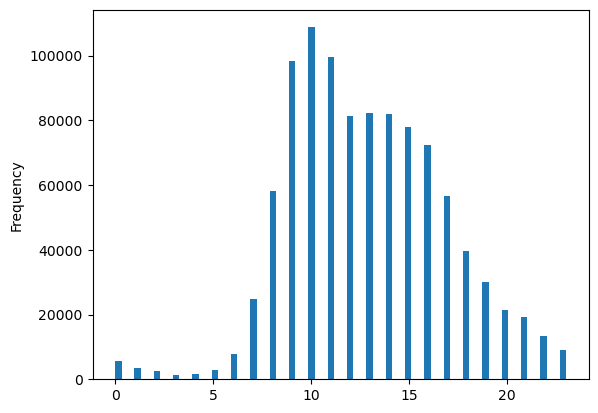

In [24]:
df_merged_few['order_hour_of_day'].plot.hist(bins = 70)

The histogram is roughly bell-shaped with a peak around a certain time (perhaps mid-day or early evening) and lower frequencies in the early morning and late night.

This type of pattern is typical for many businesses that have daily patterns of activity, such as retail stores, restaurants, and online shopping sites. The peak in the histogram represents the time of day when the business is busiest, and the lower frequencies at other times of day reflect the periods when the business is less active.

# step 4
Bar chart of loyal customers

<Axes: >

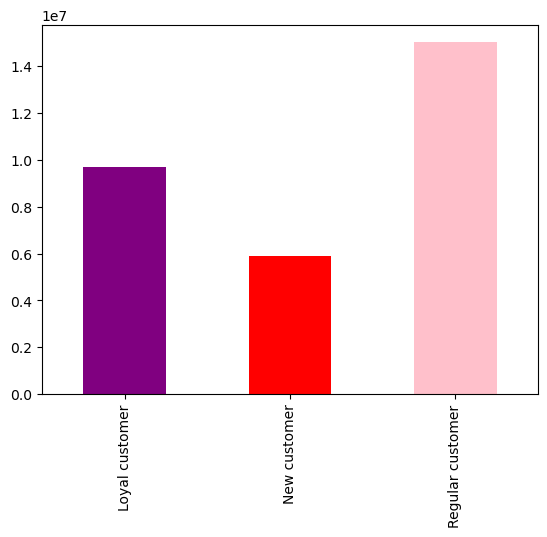

In [22]:
df_merged_few['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green','blue'])

In [25]:
np.random.seed(4)
dev = np.random.rand(len(df_merged_few)) <= 0.7

In [26]:
dev

array([False,  True, False, ..., False,  True, False])

In [27]:
np.random.rand(5)

array([0.14558531, 0.30956713, 0.87468615, 0.50287514, 0.38487566])

In [28]:
big = df_merged_few[dev]

In [30]:
small = df_merged_few[~dev]


In [31]:
len(df_merged_few)

1000000

In [32]:
len(big)+len(small)

1000000

In [34]:
df_merged_2 = small[['Age','n_dependants']]

In [35]:
line = sns.lineplot(data = df_merged_2, x = 'Age',y = 'n_dependants')

it appears that there is a correlation between age and dependents. Specifically, it appears that people between the ages of 20 and 30 tend to have a higher number of dependents than people who are older than 60 years old. However, there is also a slight increase in the number of dependents for people in their 70s compared to people in their 60s.

Here are a few insights that can be derived from this observation:

Younger people tend to have more dependents, which is likely due to having children or other family members who rely on them for support.

The decrease in dependents among people in their 60s may be due to children becoming more independent and leaving the household or older family members passing away.

The slight increase in dependents among people in their 70s may be due to a greater need for care and support as people age and their health declines.

These observations suggest that age is an important factor to consider when analyzing the number of dependents, and that other demographic factors (such as marital status, income, and education) may also play a role in determining the number of dependents a person has.

<Axes: xlabel='Age', ylabel='income'>

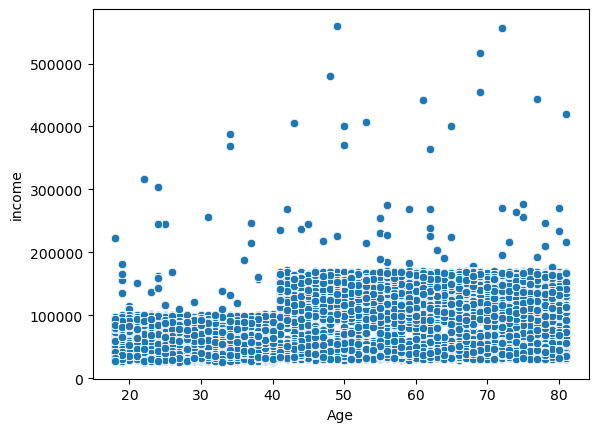

In [36]:
sns.scatterplot(x = 'Age', y = 'income',data = df_merged_few)

Based on the scatterplot , it appears that there is a relationship between age and income. Specifically, it appears that people between the ages of 20 and 40 tend to have lower incomes, around 100000, compared to people who are older than 40 years old, where the income level increases to around 200000. However, there are some outliers that may indicate additional factors are influencing income level.

Here are a few insights that can be derived from this observation:

The increase in income from ages 40 to 80 suggests that people may experience career advancement or accumulate more wealth as they age.

The concentration of points around the 100000 income level for ages 20-40 may indicate that this is a common income range for people who are starting their careers or are in entry-level positions.